In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [226]:
import sqlite3
import pandas as pd
# conn2 = sqlite3.connect("D:/News/price.db")
# price = pd.read_sql("Select * from PRICE where Sym='EURUSD'",conn2)
price = pd.read_csv('D:/EURUSD.csv', names=['Date','Time','Open','High','Low','Close','Volume'])

# Yearly

In [3]:
def seasonality(df):
    daily=df.copy()
    daily['Y']= daily.index.year

    new=pd.DataFrame()
    for y in daily.Y.unique():
        tmp=daily.loc[daily.Y==y]
        tmp['d']=range(tmp.shape[0])
        new=pd.concat([new, tmp])
    
    new.dropna(inplace=True)
    new['seasonality']=np.log(new.Close).diff()#.pct_change()
    
    # new['seasonality']=(new['seasonality']-new['seasonality'].mean())/new['seasonality'].std()
    
    dd=new[['seasonality','d']].groupby(by='d').mean()
    
    idx=pd.date_range(start='1/1/2020', end='12/31/2020')
    
    dd.set_index(idx.strftime('%m-%d'), inplace=True)
    
    # dd.plot()
    
    dd['seasonal']=(dd.seasonality.dropna()).cumsum()
    
    # dd.adj.loc['03-01':'04-01'].plot()
    return dd[['seasonal']]

In [228]:
price.set_index(pd.to_datetime(price.Date+' '+price.Time), inplace=True)

In [229]:
df = price.resample('D').agg({"Open":"first", "High":"max", "Low":"min", "Close":"last"})

In [230]:
sea=seasonality(df)
window=14
sea['z']=((sea-sea.rolling(window).mean())/sea.rolling(window).std())

In [231]:
sea.z.iloc[0:window]=sea.z.iloc[-window:]

<Axes: >

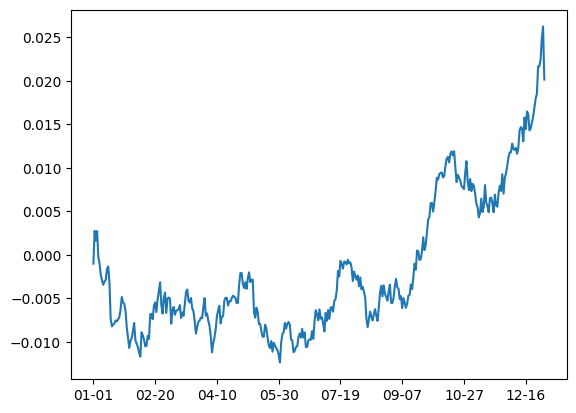

In [232]:
sea.seasonal.plot()

<Axes: >

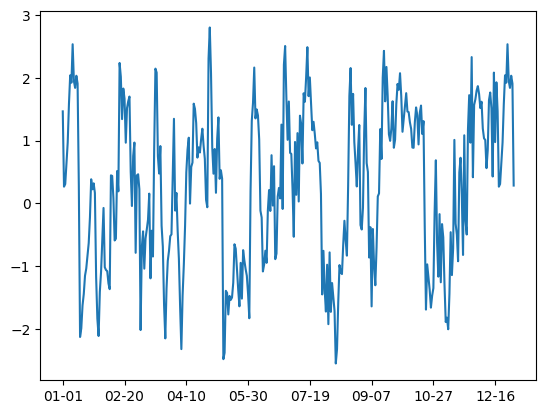

In [233]:
sea.z.plot()

In [234]:
sea.loc[sea.z<=-2].index

Index(['01-15', '01-30', '03-04', '03-24', '04-06', '05-10', '05-11', '08-09',
       '08-10', '11-08'],
      dtype='object')

In [235]:
sea.loc[sea.z>=2].index

Index(['01-07', '01-09', '01-12', '02-16', '02-17', '03-16', '03-17', '04-28',
       '04-29', '04-30', '06-04', '06-28', '06-29', '07-16', '07-17', '07-19',
       '08-21', '09-16', '09-17', '09-19', '09-30', '11-27', '12-15', '12-24',
       '12-26', '12-29'],
      dtype='object')

# Weekly

In [236]:
daily=price.resample('D').agg({"Open":"first", "High":"max", "Low":"min", "Close":"last"})

In [237]:
daily['ret']=np.log(daily.Close).diff()

In [238]:
daily['D']=daily.index.weekday

In [239]:
weekly_season=daily.groupby('D').ret.sum()

<Axes: xlabel='D'>

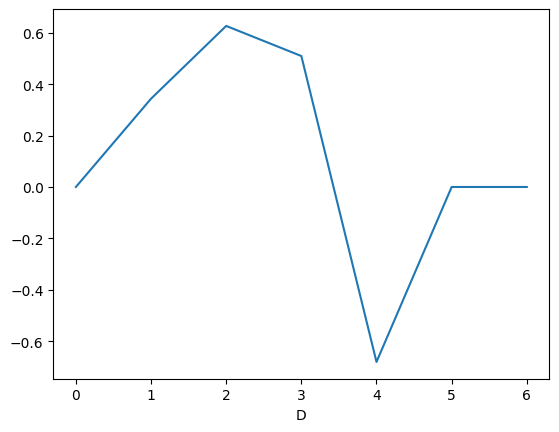

In [240]:
weekly_season.plot()

In [241]:
weekly_season

D
0    0.000000
1    0.343354
2    0.626415
3    0.509329
4   -0.680429
5    0.000000
6    0.000000
Name: ret, dtype: float64

# Daily

In [311]:
hourly=price.resample('60T').agg({"Open":"first", "High":"max", "Low":"min", "Close":"last"})

In [312]:
hourly['ret']=np.log(hourly.Close).diff()

In [313]:
hourly['H']=hourly.index.hour

In [314]:
intra_season=hourly.groupby('H').ret.sum()

In [315]:
intra_season

H
0    -0.037605
1    -0.097369
2    -0.185876
3     0.301131
4     0.453956
5     0.190329
6     0.036488
7     0.205296
8    -0.093858
9    -0.255110
10    0.254962
11   -0.264952
12   -0.952606
13   -0.240248
14   -0.301925
15    0.421896
16   -0.294878
17    0.083708
18    0.321323
19    0.316884
20    0.301298
21    0.209859
22    0.113063
23   -0.445606
Name: ret, dtype: float64

In [316]:
sig=hourly.copy()

In [317]:
sig['signal']=0
sig.loc[(sig.H>=17) & (sig.H<=22), 'signal']=1
sig.loc[(sig.H>=8) & (sig.H<=14), 'signal']=-1

<Axes: >

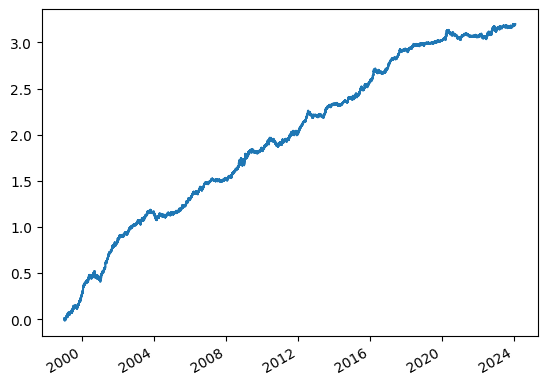

In [318]:
(sig.ret*sig.signal).dropna().cumsum().plot()

# Hourly - intraweek

In [252]:
import matplotlib.pyplot as plt

In [261]:
hourly['H'] = hourly.index.hour

In [262]:
hourly['weekday']=hourly.index.weekday

In [263]:
hourly.loc[hourly.weekday!=0, 'H']=(hourly.loc[hourly.weekday!=0, 'weekday'])*24+hourly.loc[hourly.weekday!=0, 'H']

In [264]:
# hourly.weekday.unique()

In [265]:
# hourly.loc[hourly.weekday==-1, 'weekday']=5

In [266]:
intra_season=hourly.groupby('H').ret.sum()

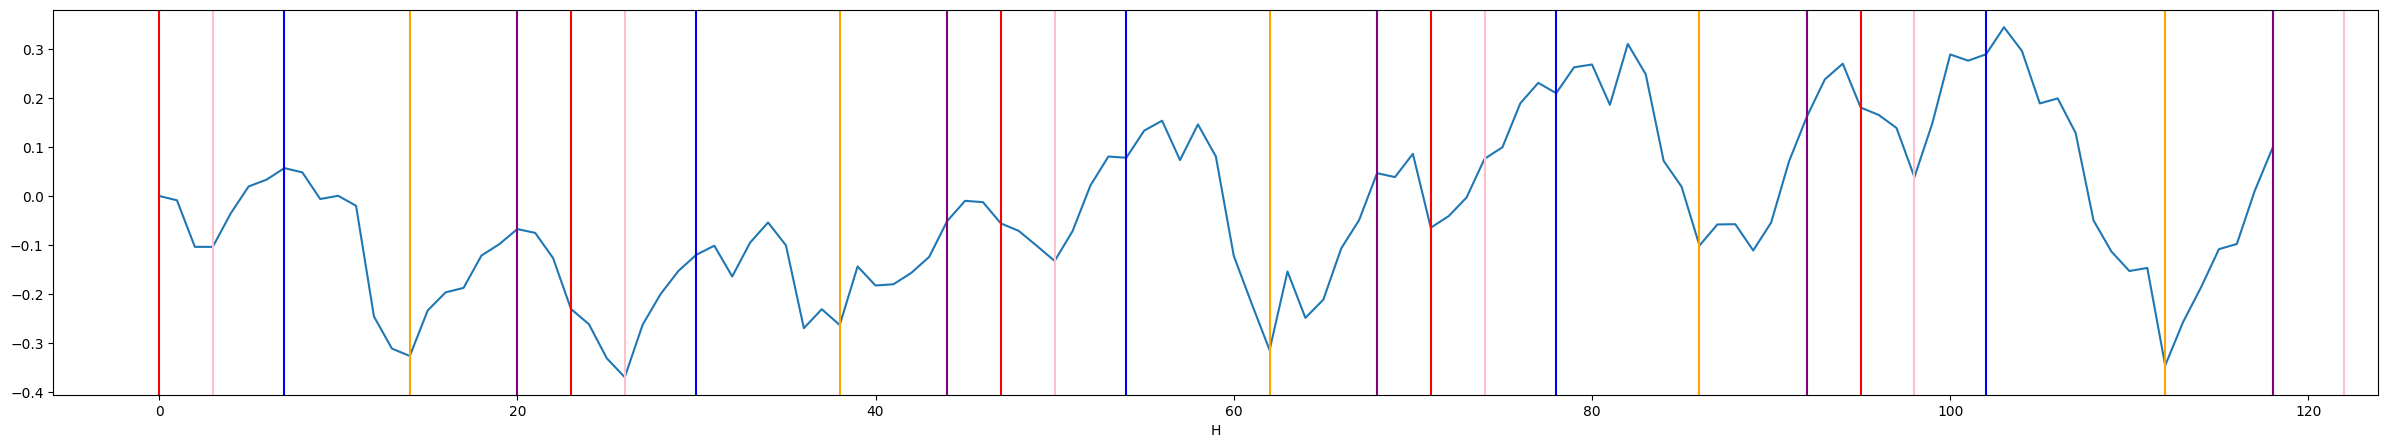

In [309]:
plt.figure(figsize=(30, 5))
intra_season.iloc[:119].cumsum().plot()
plt.axvline(x = 0, color='red')
plt.axvline(x = 23, color='red')
plt.axvline(x = 47, color='red')
plt.axvline(x = 71, color='red')
plt.axvline(x = 95, color='red')

plt.axvline(x = 3, color='pink')
plt.axvline(x = 26, color='pink')
plt.axvline(x = 50, color='pink')
plt.axvline(x = 74, color='pink')
plt.axvline(x = 98, color='pink')
plt.axvline(x = 122, color='pink')

plt.axvline(x = 7, color='blue')
plt.axvline(x = 30, color='blue')
plt.axvline(x = 54, color='blue')
plt.axvline(x = 78, color='blue')
plt.axvline(x = 102, color='blue')

plt.axvline(x = 14, color='orange')
plt.axvline(x = 38, color='orange')
plt.axvline(x = 62, color='orange')
plt.axvline(x = 86, color='orange')
plt.axvline(x = 112, color='orange')

plt.axvline(x = 20, color='purple')
plt.axvline(x = 44, color='purple')
plt.axvline(x = 68, color='purple')
plt.axvline(x = 92, color='purple')
plt.axvline(x = 118, color='purple')

In [274]:
up=intra_season.loc[intra_season>0].index

In [275]:
down=intra_season.loc[intra_season<0].index

In [281]:
sig=hourly.copy().dropna()

In [282]:
sig['signal']=0
sig.loc[sig.H.isin(up), 'signal']=1
sig.loc[sig.H.isin(down), 'signal']=-1

<Axes: >

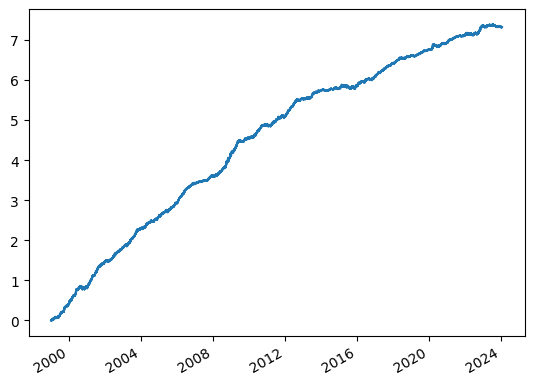

In [283]:
(sig.ret*sig.signal).cumsum().plot()

# Hourly - intraweek 2018-

In [319]:
import matplotlib.pyplot as plt

In [320]:
hourly['H'] = hourly.index.hour

In [321]:
hourly['weekday']=hourly.index.weekday

In [322]:
hourly.loc[hourly.weekday!=0, 'H']=(hourly.loc[hourly.weekday!=0, 'weekday'])*24+hourly.loc[hourly.weekday!=0, 'H']

In [330]:
hourly=hourly.loc['2018-01-01':]

In [331]:
# hourly.weekday.unique()

In [332]:
# hourly.loc[hourly.weekday==-1, 'weekday']=5

In [333]:
intra_season=hourly.groupby('H').ret.sum()

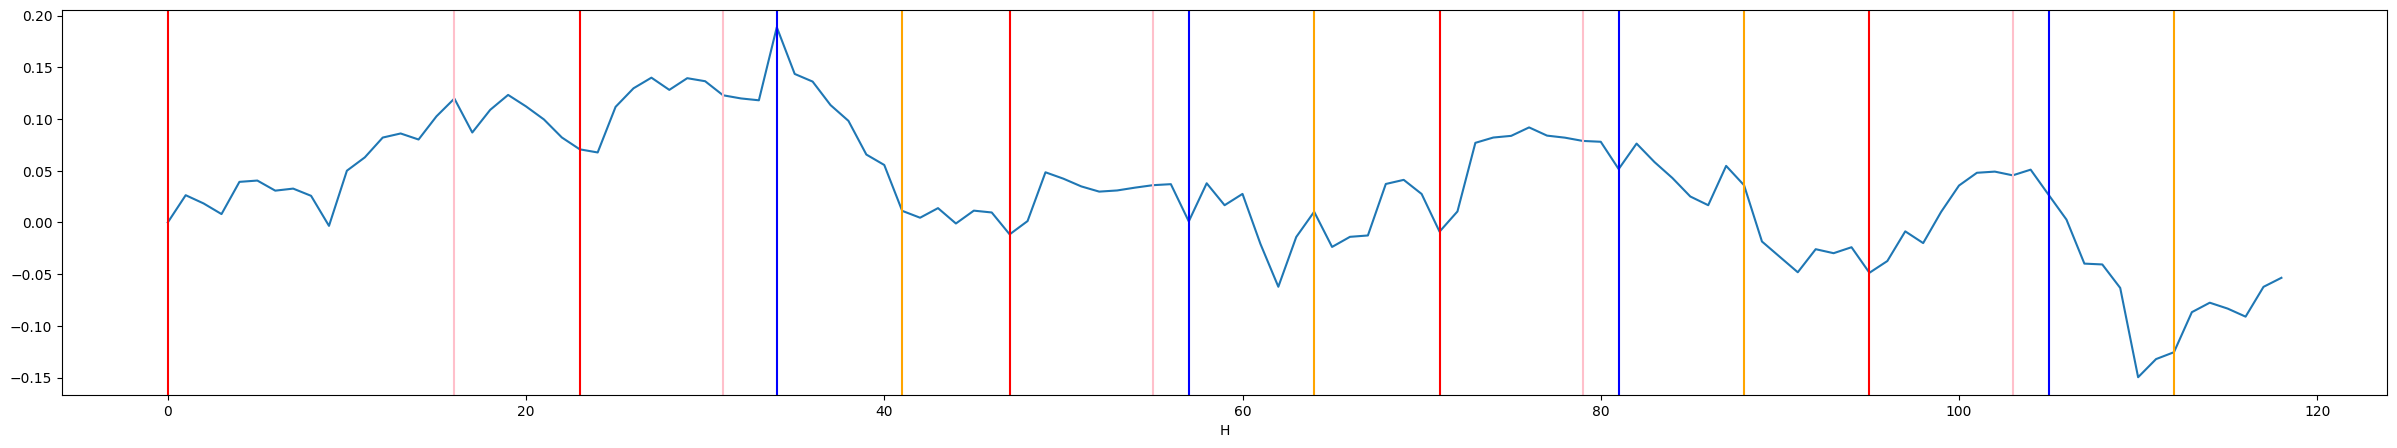

In [350]:
plt.figure(figsize=(30, 5))
intra_season.iloc[:119].cumsum().plot()
plt.axvline(x = 0, color='red')
plt.axvline(x = 23, color='red')
plt.axvline(x = 47, color='red')
plt.axvline(x = 71, color='red')
plt.axvline(x = 95, color='red')

plt.axvline(x = 16, color='pink') # buy till
plt.axvline(x = 31, color='pink')
plt.axvline(x = 55, color='pink')
plt.axvline(x = 79, color='pink')
plt.axvline(x = 103, color='pink')

plt.axvline(x = 34, color='blue')
plt.axvline(x = 57, color='blue')
plt.axvline(x = 81, color='blue')
plt.axvline(x = 105, color='blue')

plt.axvline(x = 41, color='orange')
# plt.axvline(x = 38, color='orange')
plt.axvline(x = 64, color='orange')
plt.axvline(x = 88, color='orange')
plt.axvline(x = 112, color='orange')

In [351]:
up=intra_season.loc[intra_season>0].index

In [352]:
down=intra_season.loc[intra_season<0].index

In [353]:
sig=hourly.copy().dropna()

In [354]:
sig['signal']=0
sig.loc[sig.H.isin(up), 'signal']=1
sig.loc[sig.H.isin(down), 'signal']=-1

<Axes: >

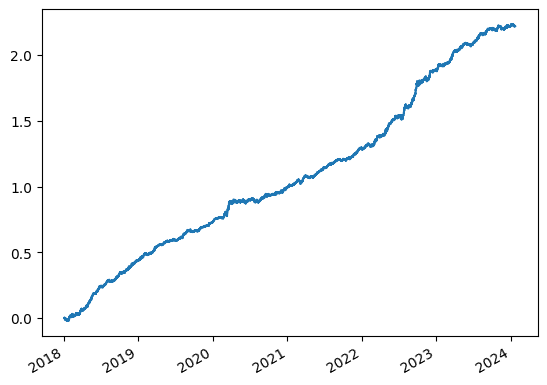

In [355]:
(sig.ret*sig.signal).cumsum().plot()